In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [42]:
dt = pd.read_csv("I:/Loan Prediction Dataset.csv")
dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
dt.shape

(614, 13)

In [44]:
dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
dt.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [46]:
dt.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
# fill the missing values for numerical terms
dt['LoanAmount'] = dt['LoanAmount'].fillna(dt['LoanAmount'].mean())
dt['Loan_Amount_Term'] = dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mean())
dt['Credit_History'] = dt['Credit_History'].fillna(dt['Credit_History'].mean()) 
dt['CoapplicantIncome'] = dt['CoapplicantIncome'].fillna(dt['CoapplicantIncome'].mean())

In [48]:
# fill the missing values for categorical terms
dt['Gender'] = dt["Gender"].fillna(dt['Gender'].mode()[0])
dt['Married'] = dt["Married"].fillna(dt['Married'].mode()[0])
dt['Dependents'] = dt["Dependents"].fillna(dt['Dependents'].mode()[0])
dt['Self_Employed'] = dt["Self_Employed"].fillna(dt['Self_Employed'].mode()[0])

In [49]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

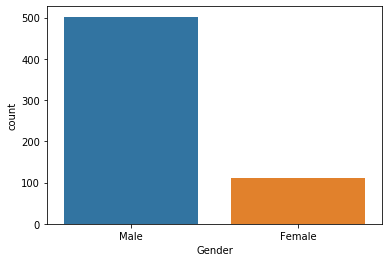

In [50]:
# categorical attributes visualization
sns.countplot(dt['Gender'])

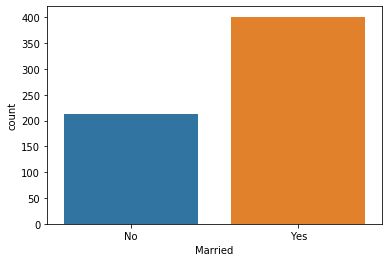

In [51]:
sns.countplot(dt['Married'])

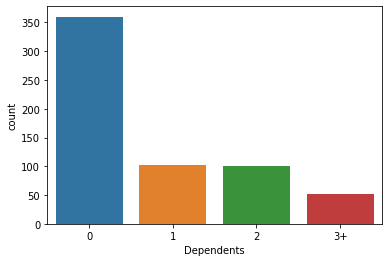

In [52]:
sns.countplot(dt['Dependents'])

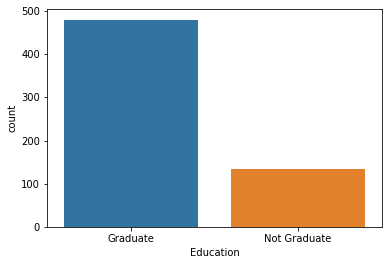

In [53]:
sns.countplot(dt['Education'])

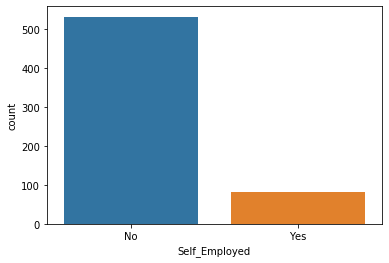

In [54]:
sns.countplot(dt['Self_Employed'])

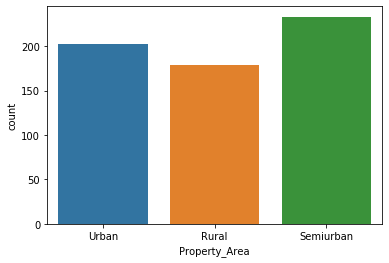

In [55]:
sns.countplot(dt['Property_Area'])

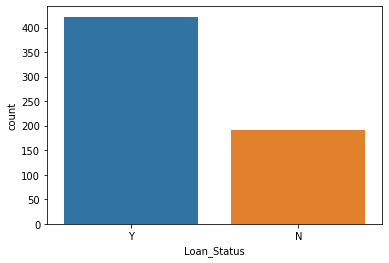

In [56]:
sns.countplot(dt['Loan_Status'])

In [57]:

dt.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [58]:
cols = ['CoapplicantIncome', 'Loan_Amount_Term', 'Loan_ID', 'CoapplicantIncome']
dt = dt.drop(columns=cols, axis=1)

In [59]:
dt.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.000000,1.0,Urban,Y


In [63]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    dt[col] = le.fit_transform(dt[col])

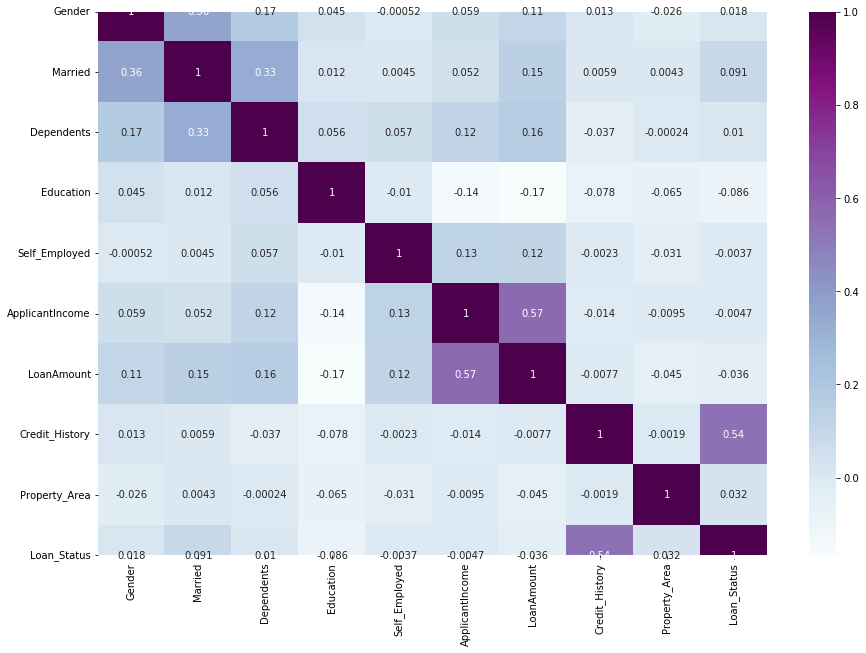

In [64]:
corr = dt.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [65]:
X = dt.drop(columns=['Loan_Status'], axis=1)
y = dt['Loan_Status']

In [66]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,0,0,0,5849,146.412162,1.0,2
1,1,1,1,0,0,4583,128.000000,1.0,0
2,1,1,0,0,1,3000,66.000000,1.0,2
3,1,1,0,1,0,2583,120.000000,1.0,2
4,1,0,0,0,0,6000,141.000000,1.0,2
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,71.000000,1.0,0
610,1,1,3,0,0,4106,40.000000,1.0,0
611,1,1,1,0,0,8072,253.000000,1.0,2
612,1,1,2,0,0,7583,187.000000,1.0,2


In [67]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [68]:
#splitting the dataset in the training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [70]:
model.fit(x_train, y_train)

LogisticRegression()

In [71]:
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 83.73983739837398


In [72]:
#predicting the test set results
y_pred = model.predict(x_test)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 18],
       [ 2, 88]], dtype=int64)

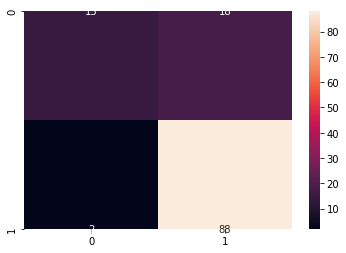

In [74]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [75]:
from sklearn.metrics import classification_report
# Predicting the values of test data
#y_pred = classifier.predict(x_test)
print('Classification report - \n', classification_report(y_test, y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [36]:
import pickle
pickle.dump(model, open('LoanModel.pkl','wb'))

In [37]:
pickle_model = pickle.load(open('LoanModel.pkl', 'rb'))


In [ ]:
!pip install catboost

In [76]:

from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier()
DTModel.fit(x_train, y_train)
print("Accuracy is", DTModel.score(x_test, y_test)*100)

Accuracy is 66.66666666666666


In [78]:
#predicting the test set results
y_predDT = DTModel.predict(x_test)


In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predDT)
cm

array([[19, 14],
       [27, 63]], dtype=int64)

In [82]:
from sklearn.metrics import classification_report
# Predicting the values of test data
#y_pred = classifier.predict(x_test)
print('Classification report - \n', classification_report(y_test, y_predDT))

Classification report - 
               precision    recall  f1-score   support

           0       0.41      0.58      0.48        33
           1       0.82      0.70      0.75        90

    accuracy                           0.67       123
   macro avg       0.62      0.64      0.62       123
weighted avg       0.71      0.67      0.68       123



In [77]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
RFModel = RandomForestClassifier()

RFModel.fit(x_train, y_train)
print("Accuracy is", RFModel.score(x_test, y_test)*100)

Accuracy is 77.23577235772358


In [80]:
#predicting the test set results
y_predRF = RFModel.predict(x_test)


In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predRF)
cm

array([[16, 17],
       [11, 79]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report
# Predicting the values of test data
#y_pred = classifier.predict(x_test)
print('Classification report - \n', classification_report(y_test, y_predRF))

Classification report - 
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        33
           1       0.82      0.88      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.68      0.69       123
weighted avg       0.76      0.77      0.76       123



In [97]:
dt1 = pd.read_csv("I:/test_loan.csv")


In [86]:
# fill the missing values for numerical terms
dt1['LoanAmount'] = dt1['LoanAmount'].fillna(dt1['LoanAmount'].mean())
dt1['Loan_Amount_Term'] = dt1['Loan_Amount_Term'].fillna(dt1['Loan_Amount_Term'].mean())
dt1['Credit_History'] = dt1['Credit_History'].fillna(dt1['Credit_History'].mean()) 
dt1['CoapplicantIncome'] = dt1['CoapplicantIncome'].fillna(dt1['CoapplicantIncome'].mean())

In [87]:
# fill the missing values for categorical terms
dt1['Gender'] = dt1["Gender"].fillna(dt1['Gender'].mode()[0])
dt1['Married'] = dt1["Married"].fillna(dt1['Married'].mode()[0])
dt1['Dependents'] = dt1["Dependents"].fillna(dt1['Dependents'].mode()[0])
dt1['Self_Employed'] = dt1["Self_Employed"].fillna(dt1['Self_Employed'].mode()[0])

In [88]:
dt1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [89]:
cols = ['CoapplicantIncome', 'Loan_Amount_Term', 'Loan_ID', 'CoapplicantIncome']
dt1 = dt1.drop(columns=cols, axis=1)

In [93]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Dependents"]
le = LabelEncoder()
for col in cols:
    dt1[col] = le.fit_transform(dt1[col])

In [94]:
new_pred=model.predict(dt1)

In [96]:
new_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [98]:
prediction=pd.DataFrame(new_pred, columns=['Predictions']).to_csv("I:/predictionsLoan.csv")